Dataset is 'Covertype'. Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more. Link: https://archive.ics.uci.edu/dataset/31/covertype

## Changelog
### 03/03/2025
- Start
- Read data from files, add headers
- View data info, check for null values and check head.
- Visualise data with matplotlib

In [4]:
import pandas as pd

headers = ['elevation','aspect','slope','horizontal_distance_to_hydrology','vertical_distance_to_hydrology','horizontal_distance_to_roadways','hillshade_9am','hillshade_noon','hillshade_3pm','horizontal_distance_to_fire_points','wilderness_area1','wilderness_area2','wilderness_area3','wilderness_area4','soil_type1','soil_type2','soil_type3','soil_type4','soil_type5','soil_type6','soil_type7','soil_type8','soil_type9','soil_type10','soil_type11','soil_type12','soil_type13','soil_type14','soil_type15','soil_type16','soil_type17','soil_type18','soil_type19','soil_type20','soil_type21','soil_type22','soil_type23','soil_type24','soil_type25','soil_type26','soil_type27','soil_type28','soil_type29','soil_type30','soil_type31','soil_type32','soil_type33','soil_type34','soil_type35','soil_type36','soil_type37','soil_type38','soil_type39','soil_type40','cover_type'
]
df = pd.read_csv('covtype.data', names=headers)


print(df.info())


print(df.isnull().sum())

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   elevation                           581012 non-null  int64
 1   aspect                              581012 non-null  int64
 2   slope                               581012 non-null  int64
 3   horizontal_distance_to_hydrology    581012 non-null  int64
 4   vertical_distance_to_hydrology      581012 non-null  int64
 5   horizontal_distance_to_roadways     581012 non-null  int64
 6   hillshade_9am                       581012 non-null  int64
 7   hillshade_noon                      581012 non-null  int64
 8   hillshade_3pm                       581012 non-null  int64
 9   horizontal_distance_to_fire_points  581012 non-null  int64
 10  wilderness_area1                    581012 non-null  int64
 11  wilderness_area2                    581012 non-null 

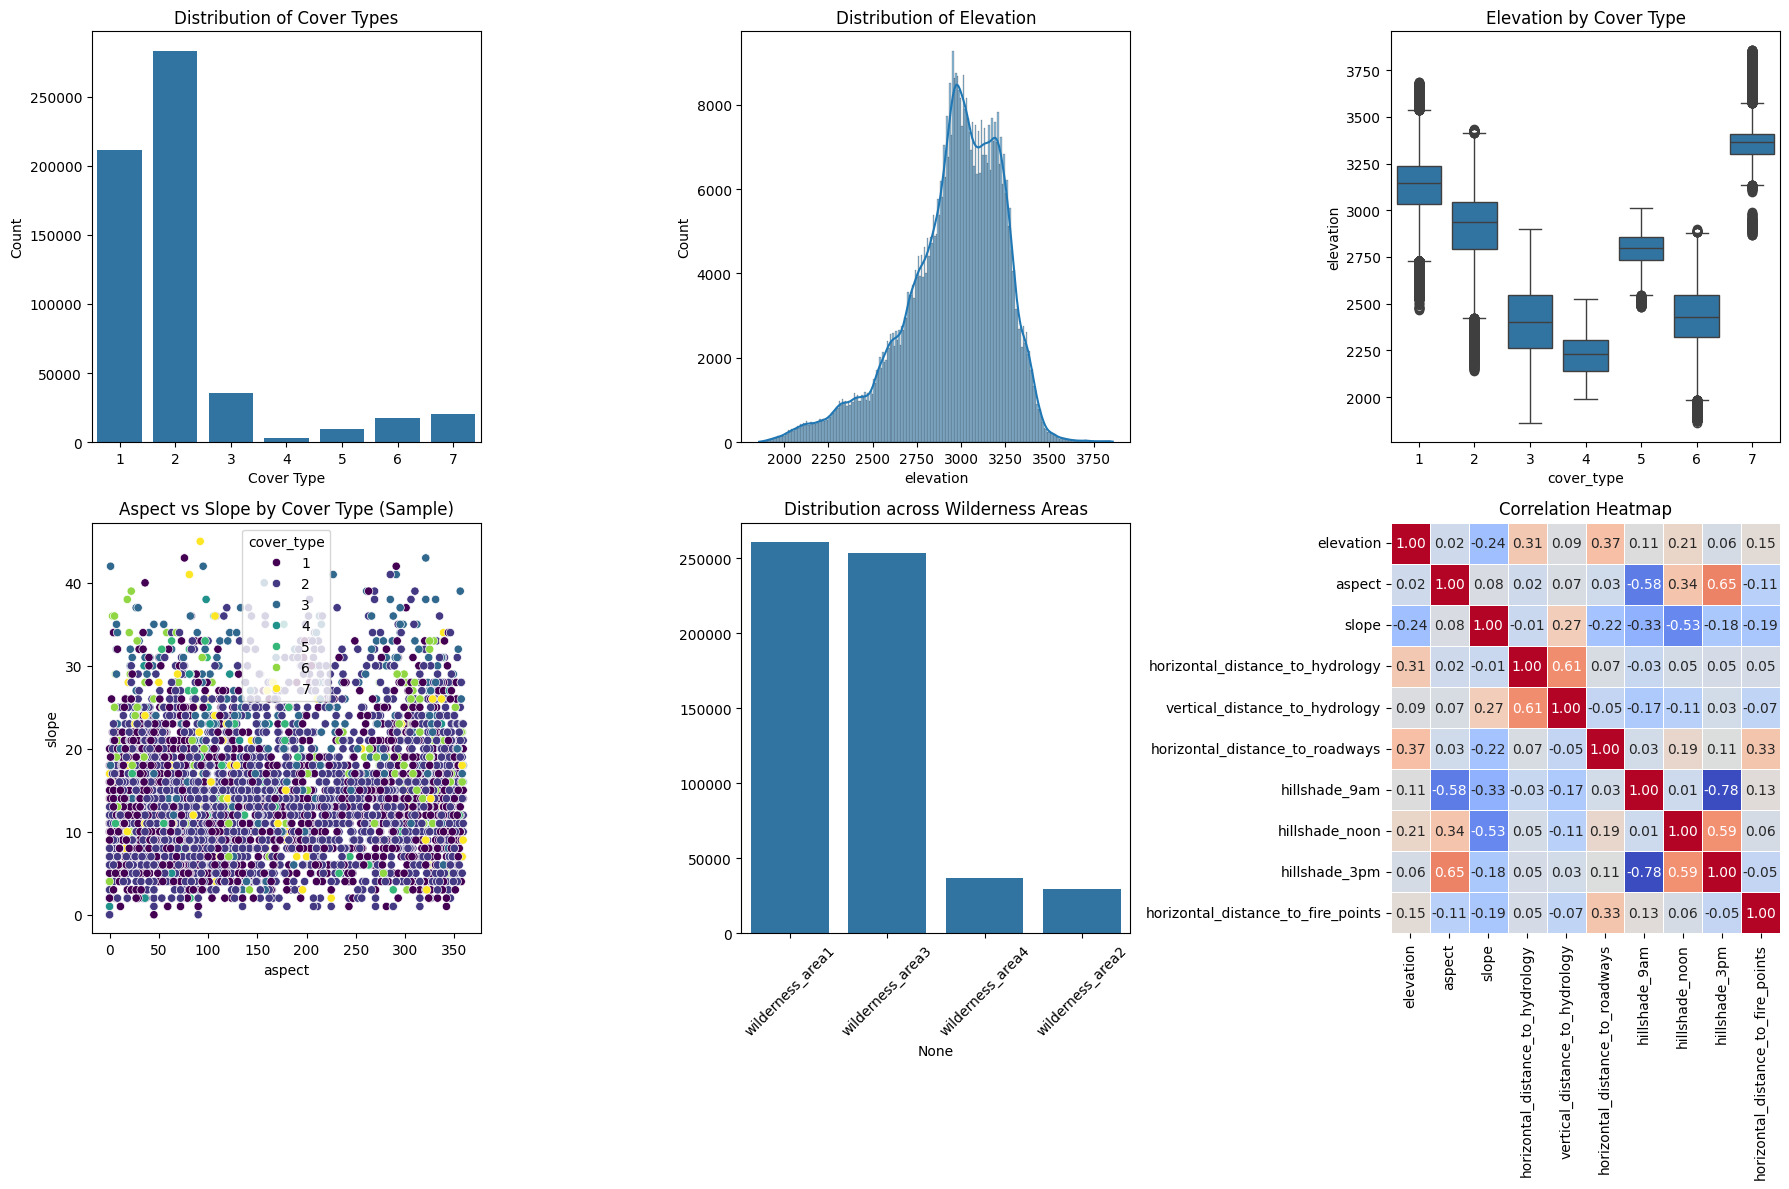

In [5]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Set up the matplotlib figure size
plt.figure(figsize=(18, 12))

# 1. Distribution of cover types
plt.subplot(2, 3, 1)
cover_counts = df['cover_type'].value_counts().sort_index()
sns.barplot(x=cover_counts.index, y=cover_counts.values)
plt.title('Distribution of Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')

# 2. Distribution of elevation
plt.subplot(2, 3, 2)
sns.histplot(df['elevation'], kde=True)
plt.title('Distribution of Elevation')

# 3. Boxplot of elevation by cover type
plt.subplot(2, 3, 3)
sns.boxplot(x='cover_type', y='elevation', data=df)
plt.title('Elevation by Cover Type')

# 4. Aspect, slope, and hillshade analysis
plt.subplot(2, 3, 4)
sns.scatterplot(x='aspect', y='slope', hue='cover_type', data=df.sample(5000), palette='viridis')
plt.title('Aspect vs Slope by Cover Type (Sample)')

# 5. Wilderness areas distribution
plt.subplot(2, 3, 5)
wilderness_cols = [col for col in df.columns if 'wilderness_area' in col]
wilderness_data = df[wilderness_cols].idxmax(axis=1).value_counts()
sns.barplot(x=wilderness_data.index, y=wilderness_data.values)
plt.title('Distribution across Wilderness Areas')
plt.xticks(rotation=45)

# 6. Correlation heatmap of numeric features
plt.subplot(2, 3, 6)
numeric_cols = ['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology', 
                'vertical_distance_to_hydrology', 'horizontal_distance_to_roadways',
                'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',
                'horizontal_distance_to_fire_points']
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=False)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Split features and target variable
X = df.drop('cover_type', axis=1)
y = df['cover_type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

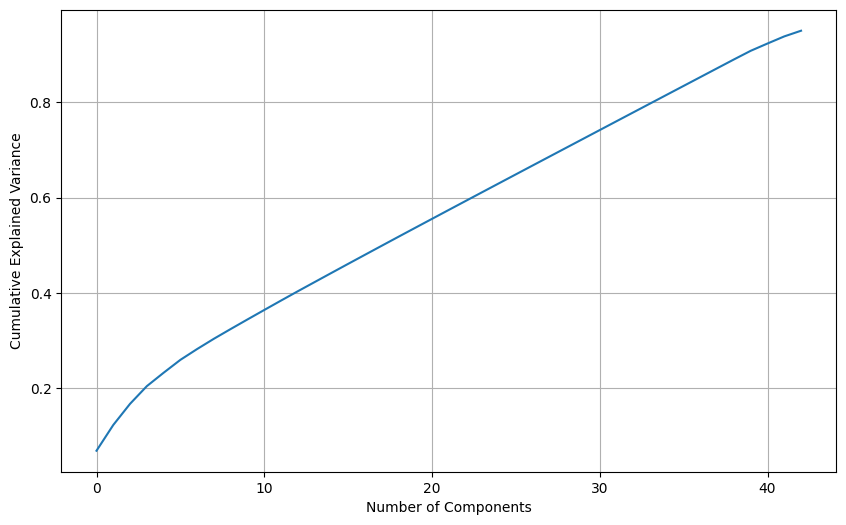

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Keep components that explain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualize explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [12]:
from sklearn.svm import SVC

# Start with a smaller subset for hyperparameter tuning
# The full dataset (581,012 records) will be too large for standard SVM
sample_size = 10000
X_sample = X_train_scaled[:sample_size]
y_sample = y_train[:sample_size]

# Train a basic SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_sample, y_sample)

SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 5],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# GridSearchCV for finding best parameters
grid_search = GridSearchCV(SVC(), param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_sample, y_sample)

# Get best parameters
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 2 folds for each of 60 candidates, totalling 120 fits
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   2.2s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   2.2s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   2.2s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   2.3s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   2.4s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   2.6s
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time=   2.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   2.9s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   3.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   3.1s
[CV] END ......................C=0.1, gamma=aut

KeyboardInterrupt: 

Accuracy: 0.7394473464540502

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.72      0.73     42557
           2       0.76      0.81      0.79     56500
           3       0.64      0.87      0.74      7121
           4       0.70      0.11      0.19       526
           5       0.70      0.07      0.13      1995
           6       0.54      0.14      0.23      3489
           7       0.71      0.56      0.63      4015

    accuracy                           0.74    116203
   macro avg       0.68      0.47      0.49    116203
weighted avg       0.74      0.74      0.73    116203



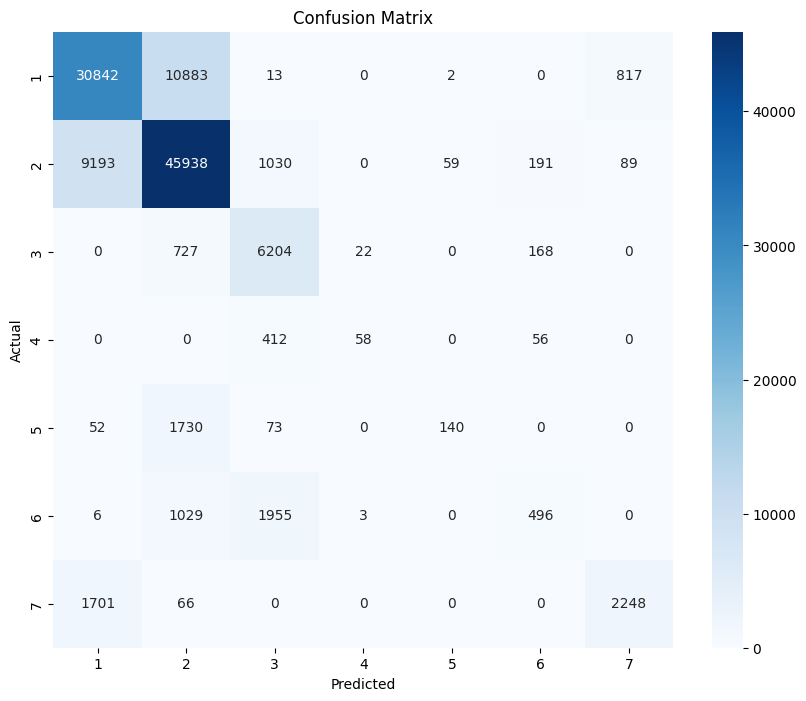

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()